 1.Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2. Create or Load the Dataset

In [2]:
# Synthetic dataset
np.random.seed(0)
num_samples = 500
X = np.random.rand(num_samples, 2) * 10  # Features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Labels (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Define the Sigmoid Function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


4. Initialize Parameters

In [4]:
def initialize_weights(dim):
    weights = np.zeros(dim)
    bias = 0
    return weights, bias


5. Define the Forward Propagation

In [5]:
def forward_propagation(X, weights, bias):
  #X: (shape;(m,n)) where, m=no. of samples, n=number of features
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return predictions


6. Compute the Loss

In [6]:
def compute_loss(y_true, predictions):
    m = len(y_true)
    loss = -1 / m * np.sum(y_true * np.log(predictions) + (1 - y_true) * np.log(1 - predictions))
    return loss
    #binary cross entropy loss function


7. Backward Propagation
Compute gradients for weights and bias.

In [7]:
def backward_propagation(X, y_true, predictions):
    m = len(y_true)
    dw = 1 / m * np.dot(X.T, (predictions - y_true))
    db = 1 / m * np.sum(predictions - y_true)
    return dw, db


8. Update Parameters
Update weights and bias using gradient descent.




In [8]:
def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias


9. Train the Logistic Regression Model

In [9]:
def train_logistic_regression(X, y, learning_rate, epochs):
    weights, bias = initialize_weights(X.shape[1])
    for i in range(epochs):
        # Forward propagation
        predictions = forward_propagation(X, weights, bias)

        # Compute loss
        loss = compute_loss(y, predictions)

        # Backward propagation
        dw, db = backward_propagation(X, y, predictions)

        # Update parameters
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")
    return weights, bias


10. Make Predictions
Convert probabilities to class labels (0 or 1).

In [10]:
def predict(X, weights, bias):
    probabilities = forward_propagation(X, weights, bias)
    return (probabilities >= 0.5).astype(int)


11. Evaluate the Model

In [15]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Train the model
learning_rate = 0.01
epochs = 4000
weights, bias = train_logistic_regression(X_train, y_train, learning_rate, epochs)

# Test the model
y_pred = predict(X_test, weights, bias)
print(f"Test Accuracy: {accuracy(y_test, y_pred):.2f}%")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6280
Epoch 200: Loss = 0.6071
Epoch 300: Loss = 0.5877
Epoch 400: Loss = 0.5695
Epoch 500: Loss = 0.5526
Epoch 600: Loss = 0.5368
Epoch 700: Loss = 0.5221
Epoch 800: Loss = 0.5083
Epoch 900: Loss = 0.4953
Epoch 1000: Loss = 0.4832
Epoch 1100: Loss = 0.4718
Epoch 1200: Loss = 0.4611
Epoch 1300: Loss = 0.4510
Epoch 1400: Loss = 0.4414
Epoch 1500: Loss = 0.4324
Epoch 1600: Loss = 0.4239
Epoch 1700: Loss = 0.4159
Epoch 1800: Loss = 0.4083
Epoch 1900: Loss = 0.4010
Epoch 2000: Loss = 0.3941
Epoch 2100: Loss = 0.3876
Epoch 2200: Loss = 0.3813
Epoch 2300: Loss = 0.3754
Epoch 2400: Loss = 0.3697
Epoch 2500: Loss = 0.3643
Epoch 2600: Loss = 0.3591
Epoch 2700: Loss = 0.3542
Epoch 2800: Loss = 0.3494
Epoch 2900: Loss = 0.3448
Epoch 3000: Loss = 0.3404
Epoch 3100: Loss = 0.3362
Epoch 3200: Loss = 0.3322
Epoch 3300: Loss = 0.3283
Epoch 3400: Loss = 0.3245
Epoch 3500: Loss = 0.3209
Epoch 3600: Loss = 0.3174
Epoch 3700: Loss = 0.3140
Epoch 3800: Loss = 0.310

12. Visualize the Decision Boundary

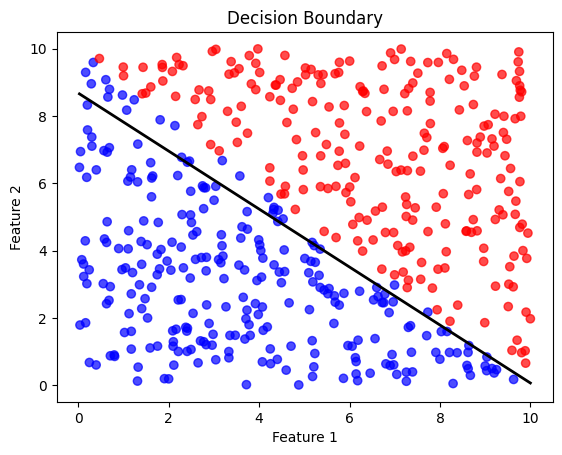

In [16]:
def plot_decision_boundary(X, y, weights, bias):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    plt.plot(x1, x2, color='black', linewidth=2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, weights, bias)
